In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
sns.set_theme( font="serif", palette="tab20")
plt.rc("axes", titlesize=20, titlepad=20, titleweight=600)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize= (10, 6))

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test =  pd.read_csv('test.csv', index_col=0)

In [4]:
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154048 entries, 00000bfd7d50f01092811bc0c8d7b0d6fe7c3596 to fffff6dbff1508ea2bfe814e5ab2729ce6b788c2
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   REGION          object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   ARPU_SEGMENT    float64
 6   FREQUENCE       float64
 7   DATA_VOLUME     float64
 8   ON_NET          float64
 9   ORANGE          float64
 10  TIGO            float64
 11  ZONE1           float64
 12  ZONE2           float64
 13  MRG             object 
 14  REGULARITY      int64  
 15  TOP_PACK        object 
 16  FREQ_TOP_PACK   float64
 17  CHURN           int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 312.2+ MB


# 1. EDA

## 1.1 Missing Values

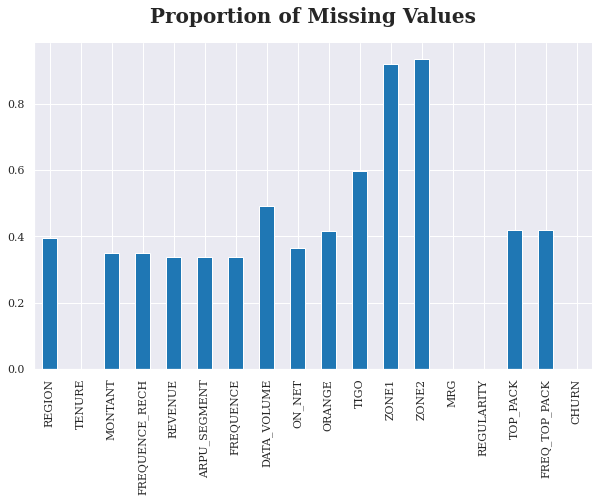

In [6]:
missing = (train.isna().sum() / train.shape[0]).plot.bar()
_ = missing.set_title("Proportion of Missing Values")

* `ZONE1` and `ZONE2` have over 90% of their values missing. Dropping them seems a good course of action.
* We'll drop them from both `train` and `test`, to ensure they have the same shape.

In [7]:
train.drop(["ZONE1", "ZONE2"], axis=1, inplace=True)
test.drop(["ZONE1", "ZONE2"], axis=1, inplace=True)

* Most of the other features have between **30% - 50%** missing values.
* Dropping rows with missing `REGION`, `MONTANT`, `DATA_VOLUME` and `TIGO` takes this down to **less than 5%**, which should be safe to impute.

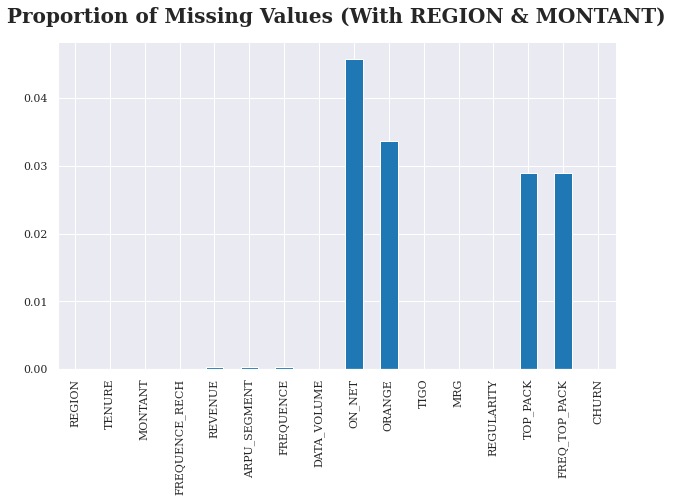

In [8]:
train.dropna(subset=["REGION", "MONTANT", "DATA_VOLUME", "TIGO"], inplace=True)

missing = (train.isna().sum() / train.shape[0]).plot.bar()
_ = missing.set_title("Proportion of Missing Values (With REGION & MONTANT)")

## 1.1 Categorical Features

In [9]:
categorical_cols = train.select_dtypes("O")
categorical_cols.describe().T

,count,unique,top,freq
REGION,481088,14,DAKAR,222546
TENURE,481088,8,K > 24 month,460018
MRG,481088,1,NO,481088
TOP_PACK,467187,104,All-net 500F=2000F;5d,106801


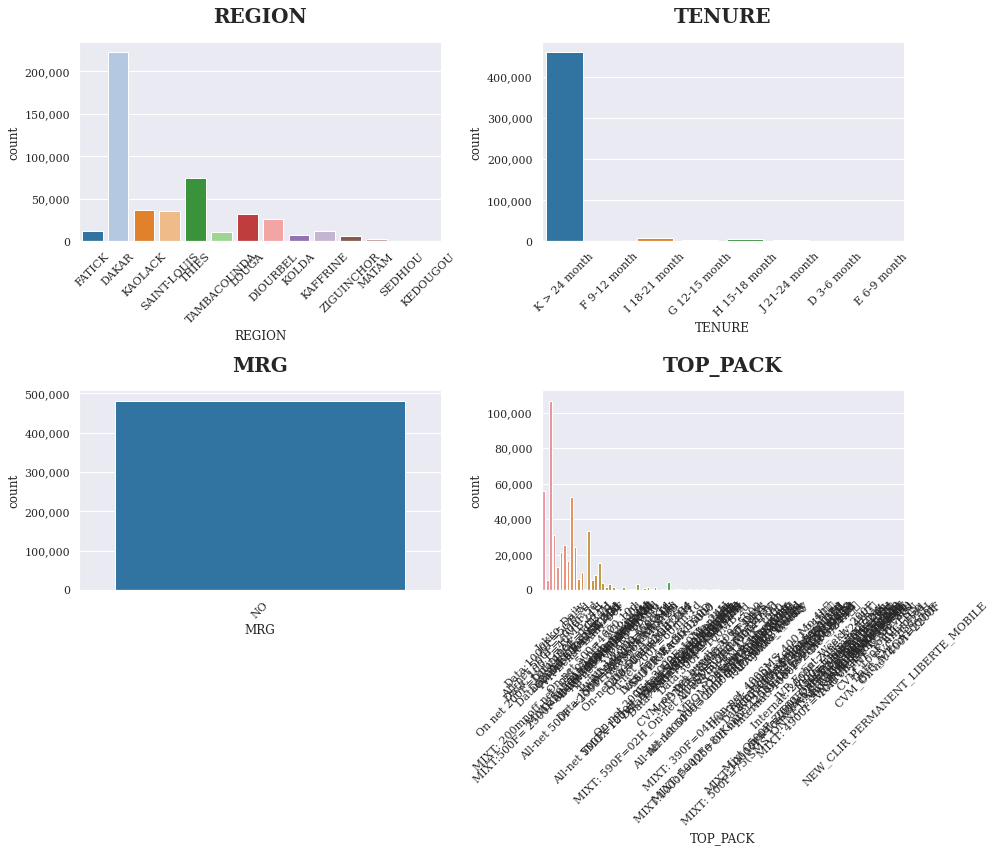

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=categorical_cols[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis="x", rotation=45)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:,.0f}"))
plt.tight_layout()

* [x] `REGION` is relatively well dispersed.
* [ ] `TENURE` is heavily imbalanced. `K > 24 month` accounts for over 95% of values. Not suitable for prediction.
* [ ] `MRG` is constant, and will not help much in predicting churn.
* [x] `TOP_PACK` has high cardinality. Perhaps label-encoding would be appropriate, since One-hot encoding would drastically inflate the dataset.

In [11]:
categorical_cols["TENURE"].value_counts(normalize=True).to_frame().style.format("{:.2%}")

,TENURE
K > 24 month,95.62%
I 18-21 month,1.75%
H 15-18 month,1.01%
J 21-24 month,0.58%
G 12-15 month,0.55%
F 9-12 month,0.40%
E 6-9 month,0.08%
D 3-6 month,0.02%


In [12]:
categorical_cols["MRG"].unique()

array(['NO'], dtype=object)

In [13]:
categorical_cols["TOP_PACK"].nunique()

104

## 1.3 Numeric Features

In [14]:
numeric_cols = train.select_dtypes("number")
numeric_cols.describe().T.style.format("{:,.2f}")

,count,mean,std,min,25%,50%,75%,max
MONTANT,"481,088.00","8,298.94","8,199.67",50.00,"2,950.00","6,000.00","11,000.00","470,000.00"
FREQUENCE_RECH,"481,088.00",17.09,15.55,1.00,6.00,12.00,24.00,133.00
REVENUE,"480,917.00","8,480.08","8,362.37",1.00,"2,992.00","6,097.00","11,373.00","532,177.00"
ARPU_SEGMENT,"480,917.00","2,826.69","2,787.45",0.00,997.00,"2,032.00","3,791.00","177,392.00"
FREQUENCE,"480,917.00",20.82,16.72,1.00,8.00,16.00,29.00,91.00
DATA_VOLUME,"481,088.00","4,436.49","9,392.40",0.00,0.00,724.00,"5,230.00","491,942.00"
ON_NET,"459,038.00",433.92,"1,108.11",0.00,12.00,68.00,331.00,"50,809.00"
ORANGE,"464,882.00",140.27,257.34,0.00,16.00,55.00,161.00,"6,555.00"
TIGO,"481,088.00",25.27,68.30,0.00,2.00,7.00,23.00,"4,174.00"
REGULARITY,"481,088.00",48.67,14.82,1.00,40.00,55.00,61.00,62.00


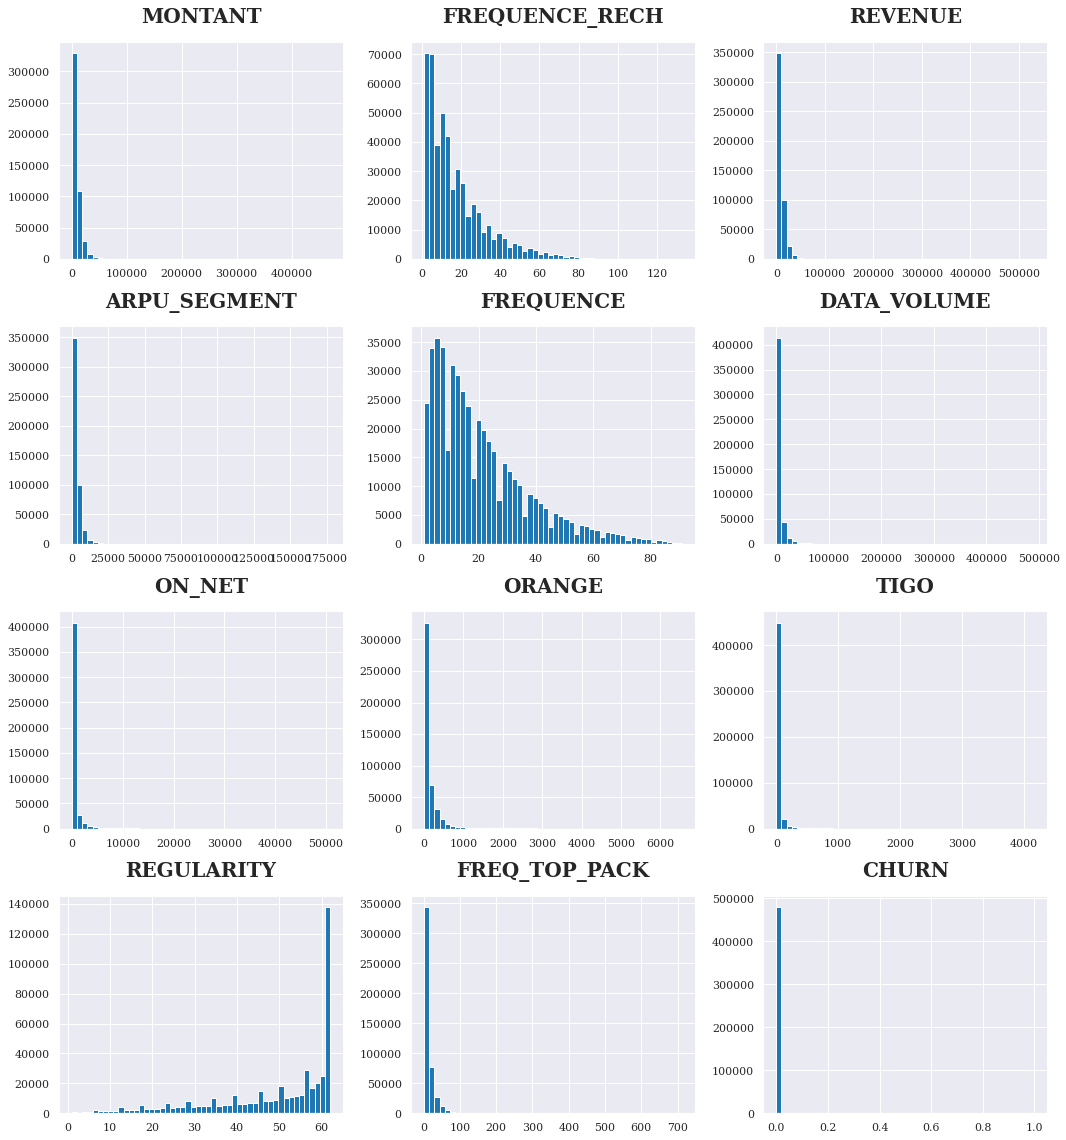

In [15]:
_ = numeric_cols.hist(figsize=(15, 16), bins=50)
plt.tight_layout()

* Most of the numeric columns are right-skewed (Except `REGULARITY` which is left-skewed) and riddled with outliers. A power-transformation or quantile-scaling can help in this regard.

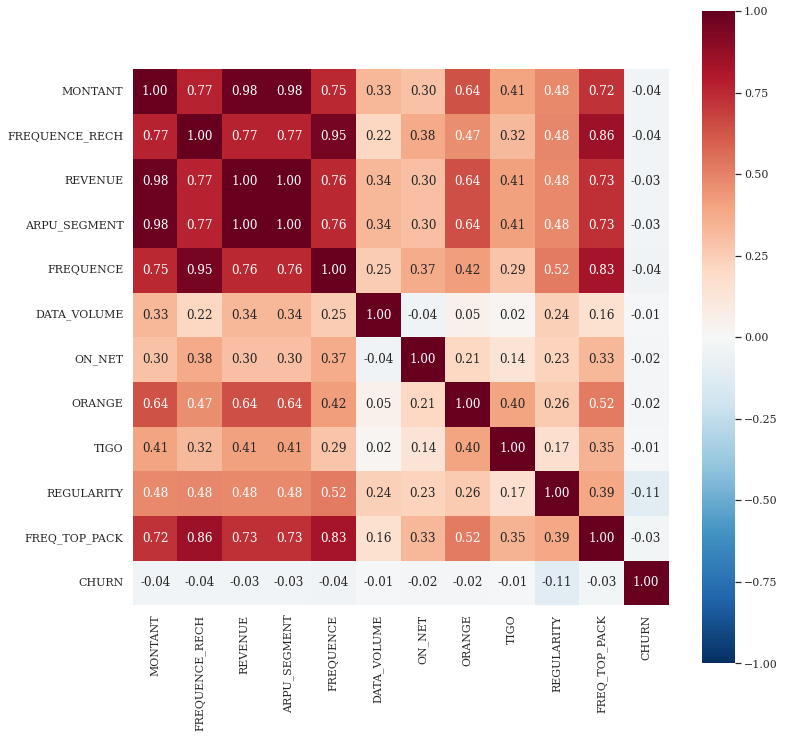

In [16]:
plt.figure(figsize=(12, 12))

correlation_df = numeric_cols.corr()
_ = sns.heatmap(correlation_df, annot=True, center=0, square=True, cmap="RdBu_r",
                fmt=".2f", vmin=-1)

* A lot of the numeric features are highly correlated. We'll use PCA to handle this.

Text(0, 0.5, 'Proporion of Explained Variance')

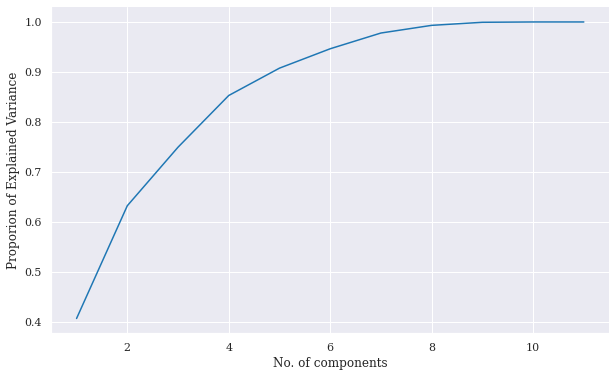

In [17]:
num_cols = numeric_cols.drop("CHURN", axis=1)
num_cols.fillna(num_cols.mean(), inplace=True)
num_cols = QuantileTransformer(output_distribution="normal").fit_transform(num_cols)

variance_ratios = [
    sum(
        PCA(n_components=x).fit(num_cols).explained_variance_ratio_
    )
    for x in range(1, 12)
]

plt.plot(range(1, 12), variance_ratios)
plt.xlabel("No. of components")
plt.ylabel("Proporion of Explained Variance")

* There's no meaningful gain in explained variance beyond 9 components.

## 1.4 Target Variable

The target variable is also heavily imbalanced. We'll employ random undersampling.

<AxesSubplot:>

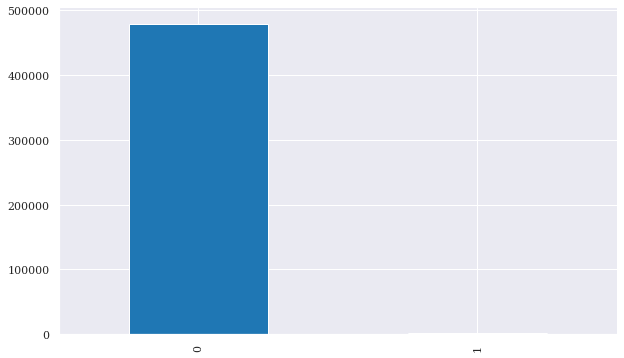

In [18]:
train["CHURN"].value_counts().plot.bar()

<AxesSubplot:>

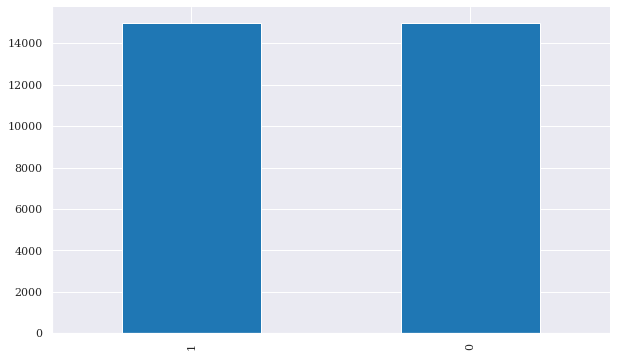

In [19]:
# Random upsampling
churn = train.query("CHURN == 1").sample(15000, random_state=5, replace=True)
# Random downsampling
no_churn = train.query("CHURN == 0").sample(15000, random_state=5)

train_resampled = pd.concat([churn, no_churn])
train_resampled["CHURN"].value_counts().plot.bar()

# 2. Modelling

## 2.1 Feature Engineering

In [20]:
categorical_features = categorical_cols.columns.drop(["TENURE", "MRG"])
categorical_features

Index(['REGION', 'TOP_PACK'], dtype='object')

In [21]:
numeric_features = numeric_cols.columns.drop(["CHURN"])
numeric_features

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')

In [22]:
categorical_preprocess = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown="use_encoded_value",
                              unknown_value=-1))
])

numeric_preprocess = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("rescale", QuantileTransformer(output_distribution="normal")),
    ("dim_reduce", PCA(n_components=9))
])

In [23]:
combined_features = ColumnTransformer(
    [
        ("categorical", categorical_preprocess, categorical_features),
        ("numeric", numeric_preprocess, numeric_features)
    ],
    n_jobs=4
)

## 2.2 Modelling

In [24]:
X = train_resampled.drop("CHURN", axis=1)
y = train_resampled["CHURN"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=2)

In [25]:
params = {
    "classifier__C": np.logspace(2, 4, 3),
    "classifier__class_weight": ["balanced"],
    "classifier__tol": np.logspace(-5, -3, 3)
}

model = Pipeline([
    ("preprocess", combined_features),
    ("normalize", StandardScaler()),
    ("classifier", SVC(random_state=4))
])

In [ ]:
best_model = GridSearchCV(model, params, scoring="roc_auc", n_jobs=6, verbose=1)
best_model.fit(X_train, y_train)

preds = best_model.predict(X_valid)
print("\nBest params:")
pprint(best_model.best_params_)
print(
    f"\nAccuracy {best_model.score(X_valid, y_valid):.2%}",
    classification_report(y_valid, preds),
    "\nConfusion matrix:",
    confusion_matrix(y_valid, preds), 
    sep="\n"
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
sample_submission = pd.read_csv("sample_submission.csv", index_col=0)
sample_submission["CHURN"] = best_model.predict(test)
sample_submission.head()

In [ ]:
sample_submission.to_csv("svc-submission.csv")